# Predicting Heart Disease Using machine Learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

> Approach
> 1. Problem Definition
> 2. Data
> 3. Evaluation
> 4. Features
> 5. Modelling
> 6. Experimentation
>
## 1. Problem Definition

In a statement,
> Given Clinical Parameters about a patient, can we predict whether a patient has heart disease or not.

## 2. Data

The original data came from the Cleveland database from the UCI MAchine Learning Repository

There is also a version of it available on Kaggle

## 3. Evaluation

> If we can reach 95% Accuracy at predicting whether or not a patient heart disease during the proof of concept, we'll pursue the project

## 4. Features

This where you'll get different information about each of the features in your data

**Create a data dictionary**

*From Kaggle or own research*

## Preparing our tools

* Pandas, matplotlib, numpy for data analysis and manipulation

In [69]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Models from scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load data

In [70]:
df = pd.read_csv("013 heart-disease.csv")
df.shape # (row, cols)

(303, 14)

## Data Exploration (EDA)

The goal here is to find out more about the data and become a subject matter expoert on the dataset we are working with

1. What questions are you trying to solve
2. What Kind of data do we have and how to treat diff types
3. What's missing from the data and how do we deal with it
4. Where are the outliers and how do we deal with them (Those that are really far away)
5. How can you add, change or remove features to get more out of you data?

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [73]:
# How many of each class there are 1 = Yes, 0 - No
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

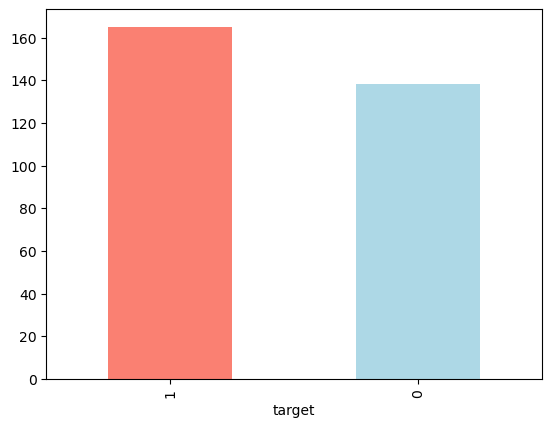

In [74]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [76]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding Patterns by comparing different columns to each other
### Heart Disease frequency according to Sex

In [78]:
# Male = 1 Female = 0
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: xlabel='sex'>

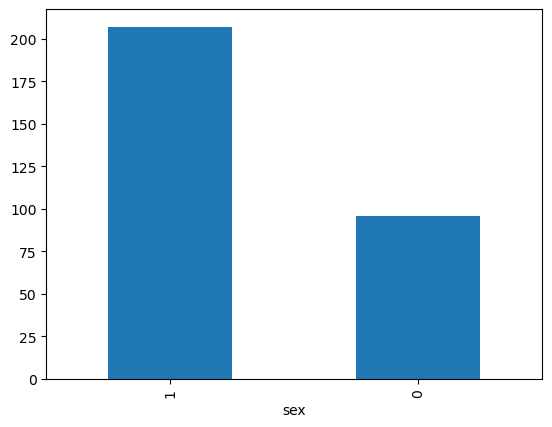

In [79]:
df.sex.value_counts().plot(kind="bar")

In [80]:
# Compare target colum with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


#### Inference from above crosstab

If the patient is a woman, there is roughly a 75% chance she has heart disease,

since total = 96 and 72 have it

and for a male the, there is roughly a 45% chance he has heart disease

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

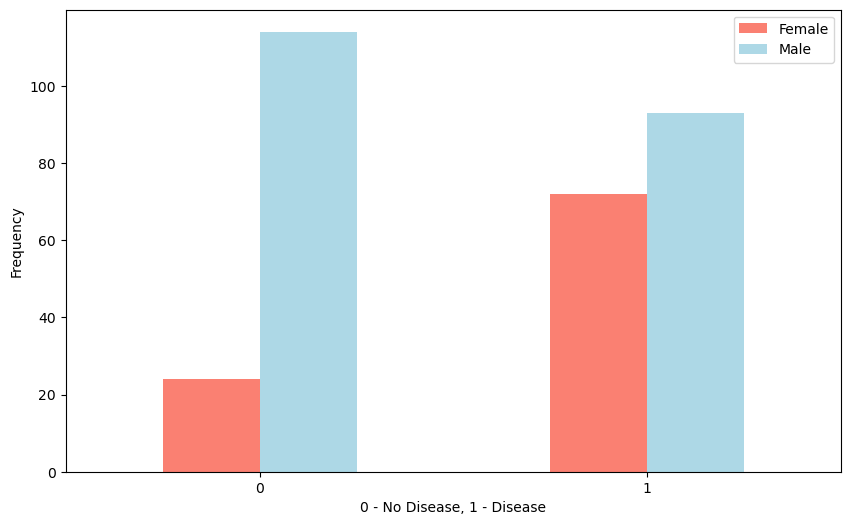

In [81]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.legend(["Female", "Male"])
plt.xlabel("0 - No Disease, 1 - Disease")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

### Heart Disease Frequency according to Age and Thalach

In [82]:
df.thalach.value_counts() # Maximum heart rate achieved

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

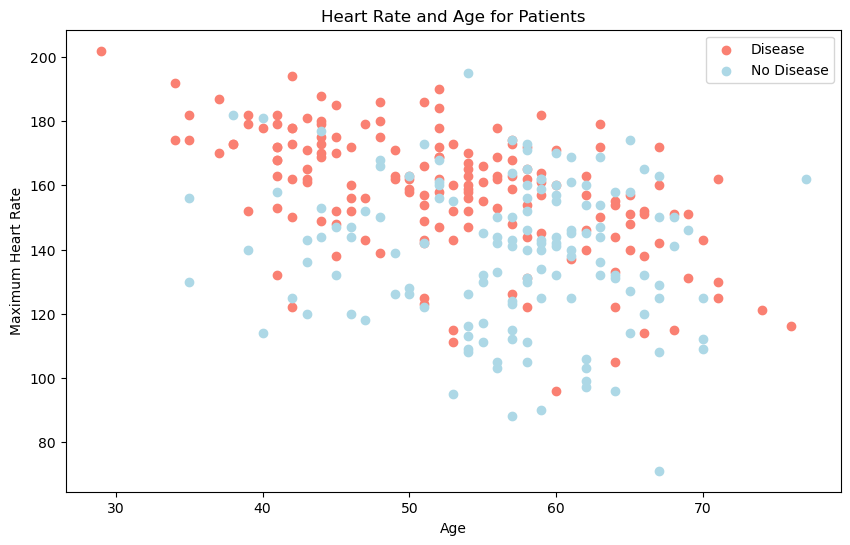

In [83]:
# craeting another figure
plt.figure(figsize=(10, 6))

#scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")
plt.title("Heart Rate and Age for Patients")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

#scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue")
# plt.title("Heart Rate and Age for Negative Patients")
plt.xlabel("Age")

plt.ylabel("Maximum Heart Rate")

plt.legend(["Disease", "No Disease"])
plt.show()

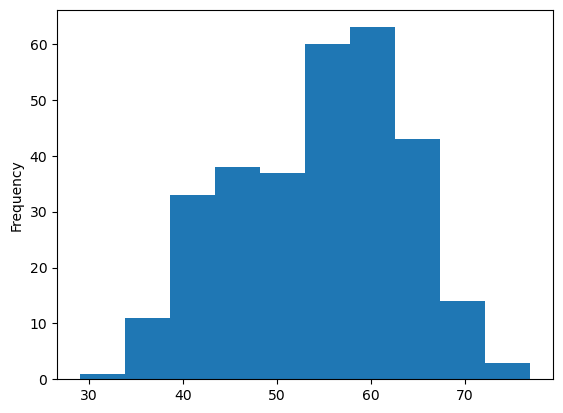

In [84]:
## Check Distribution of the age
df.age.plot.hist(); # Normal Distribution Looks like a bell curve

### Heart disease frequncy per chest pain type

cp - chest pain type
* 0. Typical angina: chest pain related to decrease in blood supply to the heart
* 1. Atypical angina: chest pain not related to the heart
* 2. Non-anginal pain: typically esophageal spasms (non heart related)
* 3. Asymptomatic: Chest Pain not showing any sign of disease 

In [85]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


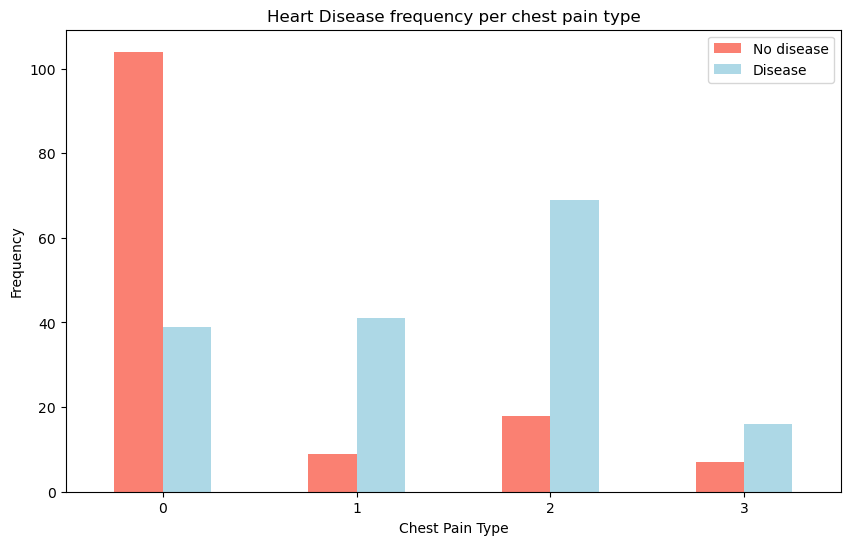

In [86]:
## Make it visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

In [87]:
## Building a corelation matrix (table of numbers explain how columns relate with each other)
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
# Make C-rrelation matrix visual
corr_matrix = df.corr()
fig, ax = plt.subplot(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Modelling

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
#Split data into X and y and training and test split
X = df.drop("target", axis=1)
y = df.target

In [91]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [92]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [96]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [98]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## Build the model
Try three different models

* Logistic Regression
* KNearestNeighbors
* RandomForestClassifier

In [102]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#function to fit and score different models on the same data
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """ 
    Fits and evaluates given machine learning models
    models : A dict of different Scikit-Learn models
    X_train : Training data (no labels)
    X_test : Testing data (no labels)
    y_train : Training labels
    y_test : Testing Labels
    """
    # Set random seed
    np.random.seed(42)
    # make a dict to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # fit to data
        model.fit(X_train, y_train)
        #evaluate and append score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [103]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

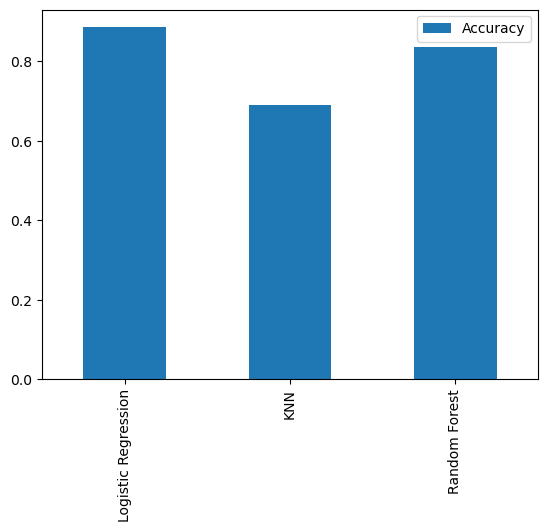

In [108]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()

### Tuning Improving the model

Now we got baseline models

What to tackle:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Recall
* Precision
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### HyperParameter Tuning

In [112]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbors = range(1, 21)

#Set up KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the algorithm
    knn.fit(X_train, y_train)
    #Update the training scores_list
    train_scores.append(knn.score(X_train, y_train))
    #update the test_scores list
    test_scores.append(knn.score(X_test, y_test))

In [113]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [114]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data: 75.41%


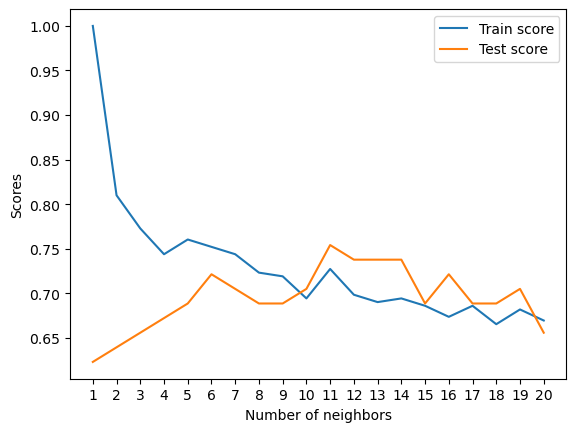

In [116]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Scores")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning using RandomizedSearchCV

We're going to tune:
* Logistic Regression()
* RandomForestClassifier()

...Using RandomizedSearchCV

In [126]:
# Create a hyperparameter grid for logistic Regressiob
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# create a hyperparameter grid for RandomForest
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [120]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hrperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search mdoel for Log reg
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [121]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [122]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [127]:
# Tune RandomForestClassifier

np.random.seed(42)

# setup random hyperparameter search for Random forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
# fit random hyperparameter search model for randomised search
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [128]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [129]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning using gridSearchCV that exhaustively over specified parameter values

We'll use LogisticRegression since it is the best model so far

In [131]:
# Create a diff hyperparameter grid

log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit random hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [132]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [133]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating the tuned model, beyond accuracy

* ROC curve and AUC Score
* Confusion matrix
* classification report
* precision
* recall f1 score
  

In [134]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)


In [135]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [136]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

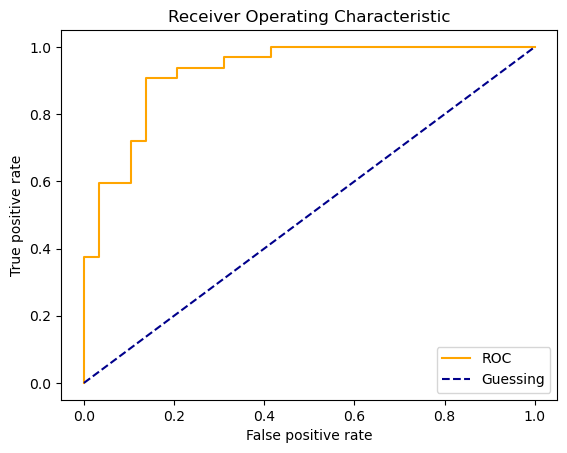

In [141]:
# Plotting a roc curve and calculate AUC metric

y_proba = gs_log_reg.predict_proba(X_test)
y_proba_pos = y_proba[:, 1]
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_pos)
#plot a ROC Curve
#create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    #Plot Roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [142]:
# AUC Score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_pos)

0.9245689655172414

In [144]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


### Get classification report as well as cross validated precision, recall and f1 score

In [145]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate classification report using cross validation


In [146]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [148]:
# create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [159]:
# Cross validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = cv_acc.mean()

In [154]:
# cross validated precision

cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec = cv_prec.mean()
cv_prec

0.8207936507936507

In [155]:
# cross validated recall

cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_rec = cv_rec.mean()
cv_rec

0.9212121212121213

In [157]:
# cross validated f1 score

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

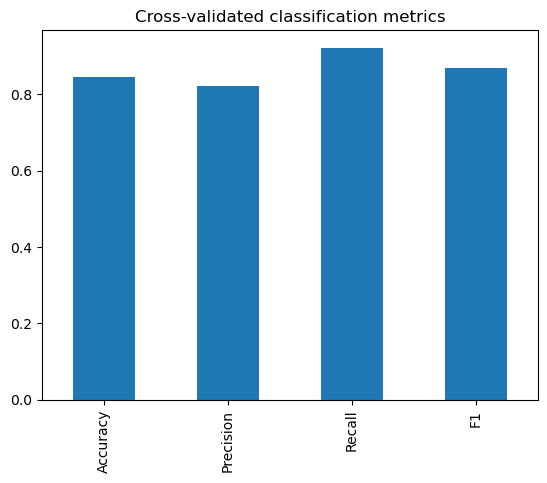

In [161]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_prec,
    "Recall": cv_rec,
    "F1": cv_f1},
    index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature Importance

"Which features contributed the most to the outcomes of the model and how did they contribute"

Finding feature importance, is different for each model

In [163]:
# fit an instance of Logistic regression

clf.fit(X_train, y_train);

In [164]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [168]:
# Match coef's of features to columns

features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

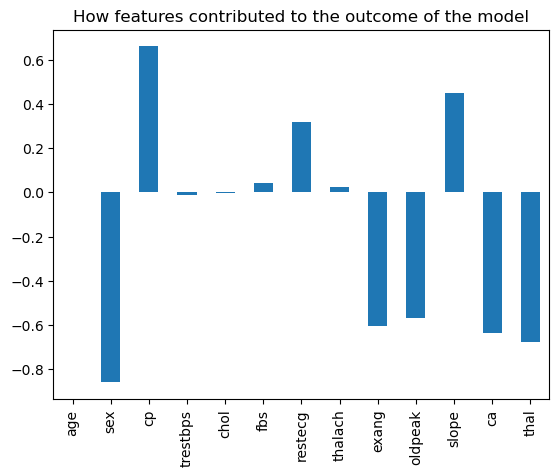

In [173]:
## Visualize feature importants
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title="How features contributed to the outcome of the model", legend=False);